このノートブックでは、コンペで与えられたデータセットを見ていきましよう。

### 目的：
このデータセットはメルセデス・ベンツの車の情報が匿名化されて含まれています。
yはテストを通過するための時間（秒）です。

まず必要なモジュールをインポートしましょう。

In [3]:
import numpy as np # 線形代数のためのモジュール
import pandas as pd # ファイルの読み込み
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
# pip install xgboost

color = sns.color_palette() 

%matplotlib inline

pd.options.mode.chained_assignment = None # スライスして代入したときの警告をなくす
pd.options.display.max_columns = 999 # カラムを表示するときの上限を999に設定する。

# これいるか？ ls で出せるよ。
from subprocess import check_output
print(check_output(['ls', './competitions/mercedes-benz-greener-manufacturing/']).decode('utf-8'))

sample_submission.csv.zip
test.csv
test.csv.zip
train.csv
train.csv.zip



In [26]:
dir_data = './competitions/mercedes-benz-greener-manufacturing/'
train_df = pd.read_csv(dir_data + 'train.csv')
test_df = pd.read_csv(dir_data + 'test.csv')
print("Train shape：", train_df.shape)
print("Test shape：", test_df.shape)
# 

Train shape： (4209, 378)
Test shape： (4209, 377)


結構小さいデータだね。過学習しないようにしないとね！
まずちょっと覗いてみましょう。

In [5]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

### ターゲット変数：

yが予測する変数だ。
だからまずyを分析してみよう。

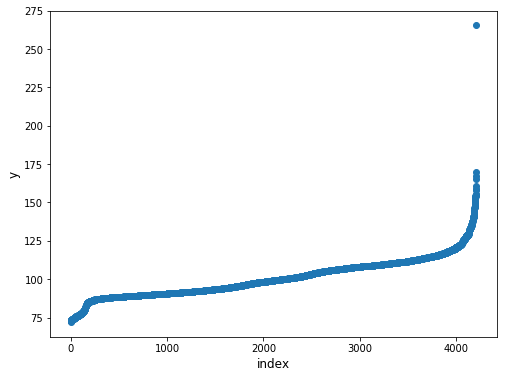

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

一つのデータは残りよりかなり上だね。（右上のポッチ）

分布グラフをプロットしてみよう。

In [7]:
train_df.y.head()
# train_df['y'].head()と同じ

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

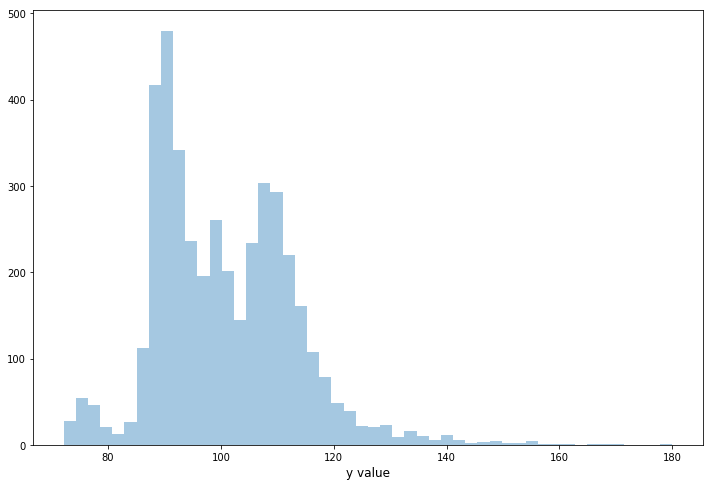

In [8]:
# 180以上かかっているものをはじく
ulimit = 180
train_df['y'].loc[train_df['y']>ulimit] = ulimit
# 分布図をプロット
plt.figure(figsize=(12,8))
sns.distplot(train_df.y.values, bins=50, kde=False) # bins: メモリの刻み kdeが確率分布を表示するか
plt.xlabel('y value', fontsize = 12)
plt.show()
# だいたい85から120あたりに分布している

さてデータセットの変数のデータ型を見てみましょう。

In [9]:
# 項目ごとの型を調べる
# 項目名、型のみをdataframeにする
dtype_df = train_df.dtypes.reset_index()
# 各項目名をCount,Column Typeにする
dtype_df.columns = ["Count", "Column Type"]
# Column Typeごとに集計する
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


大体int64、目的変数はfloatで、8つがカテゴリーデータ。

In [10]:
dtype_df.iloc[:10,:]

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


X0からX8までがカテゴリーデータですね。

**欠損値**

欠損値を確認してみましょう。

In [11]:
# ここは習熟する必要がある　欠損値を見つけるやり方！
# それぞれのデータがnullかをTrue Falseで表し、列ごとに合計し、インデックスを付加する
missing_df = train_df.isnull().sum(axis=0).reset_index()
# カラム名を設定
missing_df.columns = ['columns_name', 'missing_count']
# 欠損値の合計が0以上あるカラム名だけ残す
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df
# 表示されないのですべて欠損値の数が0、つまり欠損値はない

,columns_name,missing_count


よかった今回は欠損値はないみたいだね :)
※ どうでもいいが　:)はスマイルらしいよ

### 整数値の列の分析：

In [12]:
unique_values_dict = {}
# 整数値
for col in train_df.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]: # カテゴリとidとyを弾くと残りは整数値の項目
        unique_value = str(np.sort(train_df[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
        # ここの挙動は項目ごとのユニーク値をリスト化して文字列にする。
        # その文字列がunique_values_dictにあればtlistにそのvalueを出してtlistに格納
        # tlistに項目を追加してunique_values_dictに再度格納する
        
        
# データの取る値、範囲で分けられる    
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values：", unique_val)
    print(columns)
    print('----------------------------------------------')

Columns containing the unique values： [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 

In [13]:
unique_values_dict = {}
for col in train_df.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(train_df[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")
        

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

整数値は２値データもしくは０のみの項目だ。
これらの項目はモデル学習で排除されるかもしれない。（0値のみでは特徴にならないので捨てられるはず）

次にカテゴリーデータの項目を分析してみましょう。

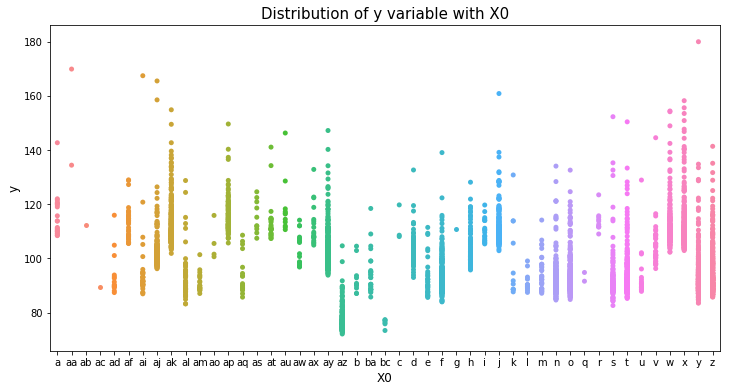

In [14]:
var_name = 'X0'
col_order = np.sort(train_df[var_name].unique().tolist())
plt.figure(figsize=(12, 6))
# そのカテゴリーのy値をそれぞれプロットする 
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with " + var_name, fontsize=15)
plt.show()
# めっちゃきれい!!
# カテゴリごとにどういうyの値を取っているかが分かりやすい

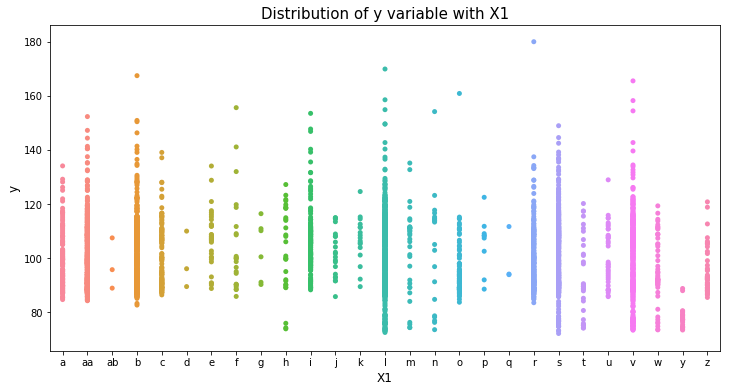

In [15]:
# 上記と同じようにX1でもカテゴリーごとのyの値をプロットしてみる
var_name = 'X1'
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12, 6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with " + var_name, fontsize=15)
plt.show()

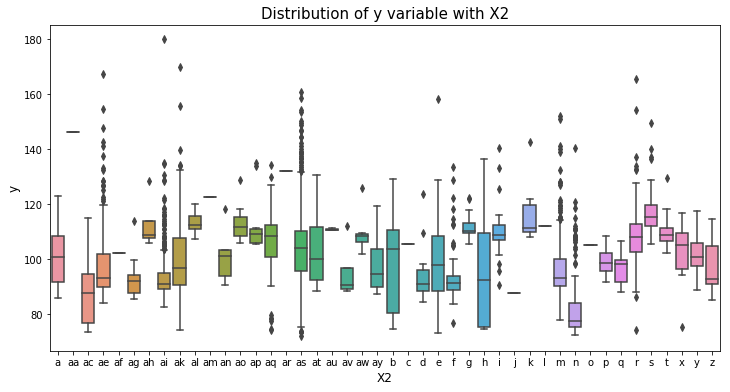

In [16]:
# 上記と同じようにX1でもカテゴリーごとのyの値をプロットしてみる
var_name = "X2"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order= col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with " + var_name, fontsize=15)
plt.show()
# 箱ひげ図だと外れ値があると可視化してくれるので便利

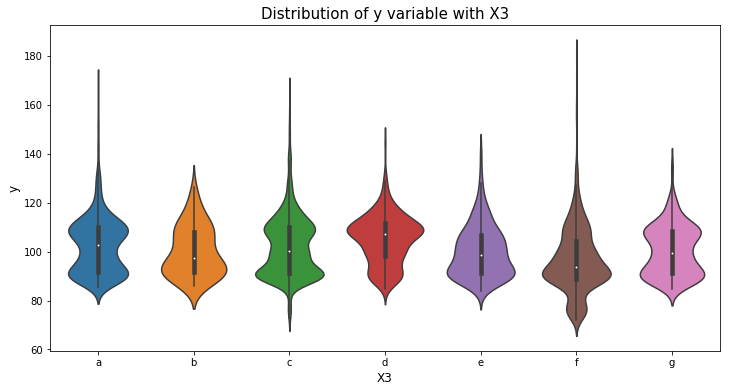

In [17]:
var_name = "X3"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12, 6))
# バイオリンプロット　箱ひげ図と違ってそれぞれのｙの値の数の分布が見える
# 一般的に箱ひげ図より情報は多い
sns.violinplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with " + var_name, fontsize=15)
plt.show()
# バイオリンプロットだとyの値にどれくらいいるかがひと目で分かる

Text(0.5,1,'Distribution of y variable with X4')

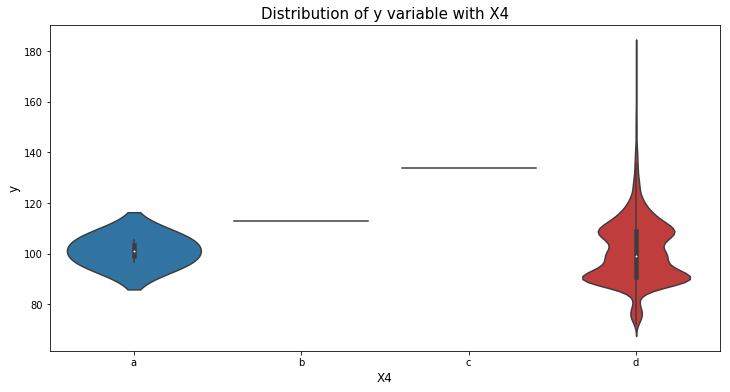

In [18]:
var_name = 'X4'
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with " + var_name, fontsize=15)
# b,cは一点しかないのかな？

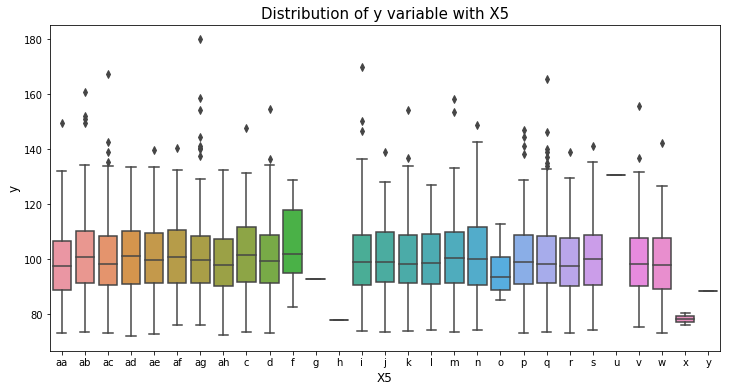

In [29]:
var_name = "X5"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()
# カテゴリー間であまり変化が見られない
# g,h,x,yはサンプルが少ない模様

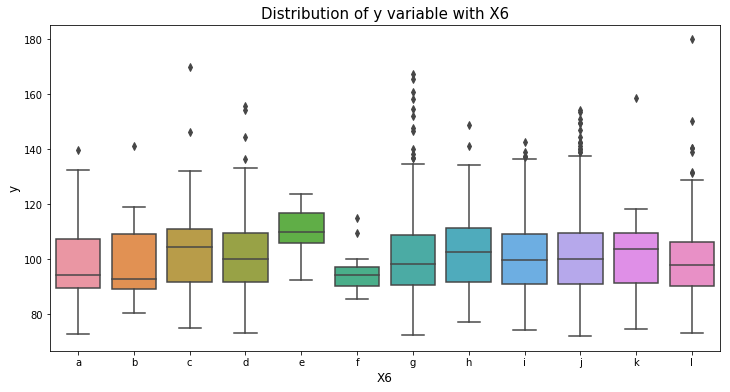

In [19]:
var_name = 'X6'
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12, 6))
sns.boxplot(x=var_name, y='y', data=train_df, order= col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with " + var_name, fontsize=15)
plt.show()
# X6もカテゴリーごとに大きな差は見られない

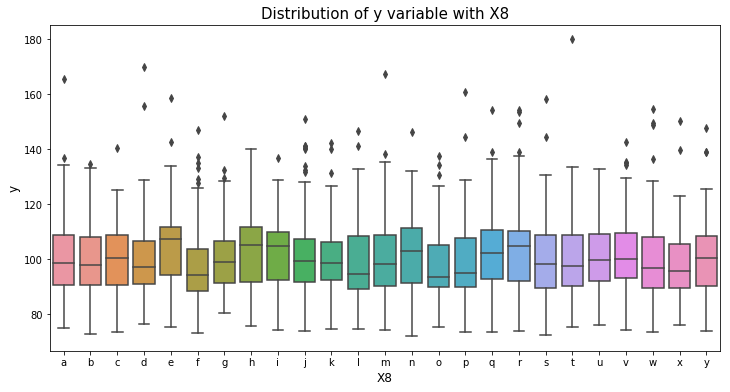

In [20]:
var_name = "X8"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12, 6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with " + var_name, fontsize=15)
plt.show()
# X8もあんまり違いがないね

**２値データ：**

さて2値データを見ていきましょう。
前見たようにかなりの数あります。なのでそれぞれの変数で０，１の数を数えてみましょう。

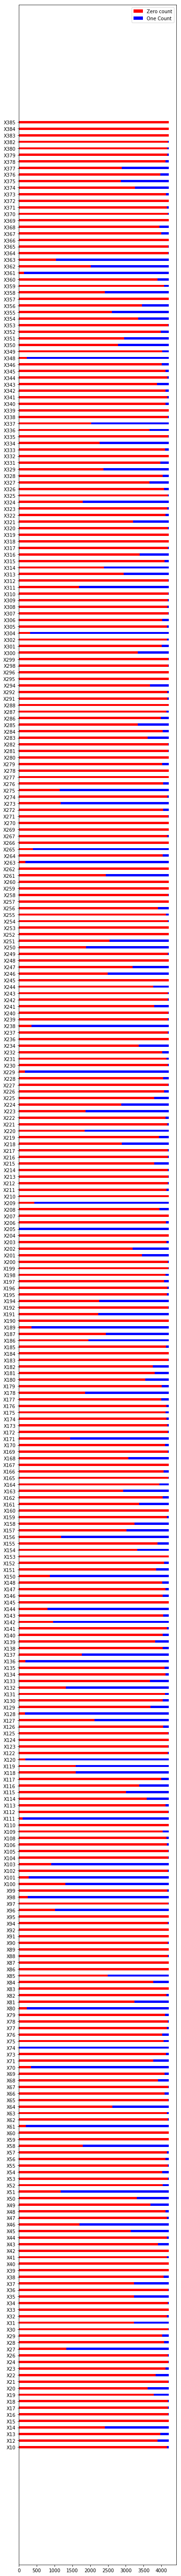

In [21]:
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
# 2値データの変数の０，１のデータの個数を格納する
for col in cols_list:
    zero_count_list.append((train_df[col]==0).sum())
    one_count_list.append((train_df[col]==1).sum())
    
N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6, 100))
# barh = bar horizontal 棒グラフの横向き　
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color='blue')
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count')) # 凡例を表示する
plt.show()
# 目に毒なグラフが出てきた　パッと見で01の割合が分かる

さて各２値変数のyの平均値を見てみましょう。

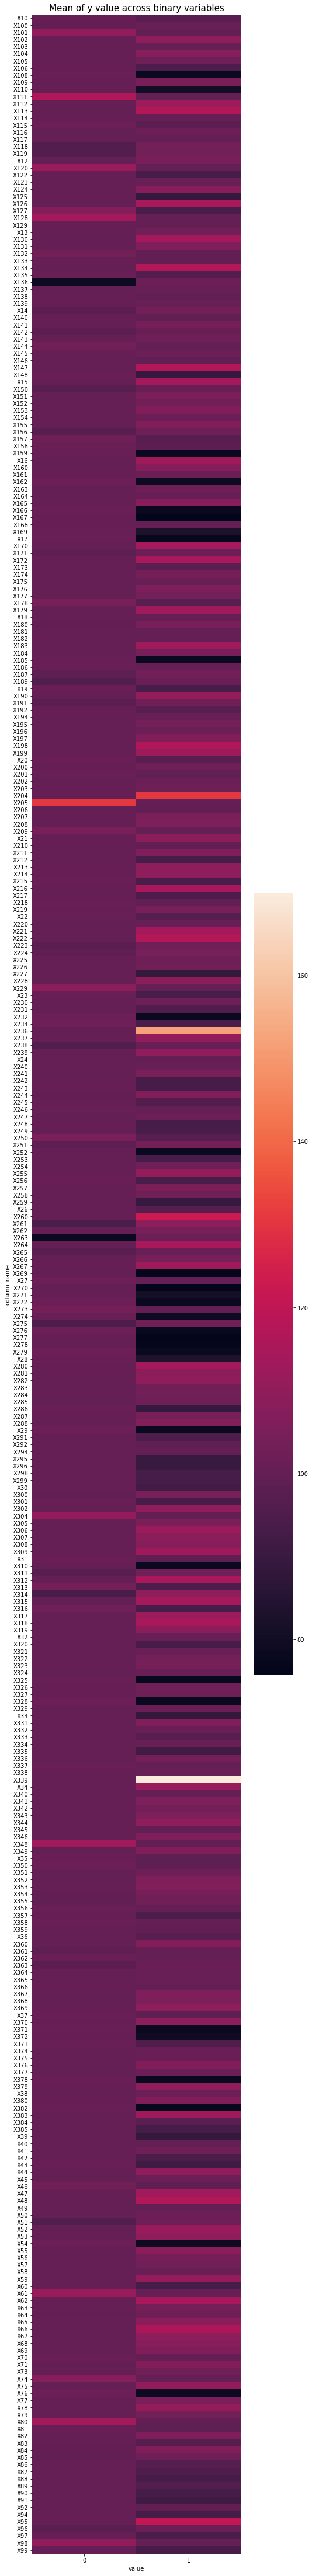

In [22]:
zero_mean_list =[]
one_mean_list = []
cols_list = unique_values_dict['[0, 1]']
# 0,1項目の0,1それぞれの行のyの平均
for col in cols_list:
    zero_mean_list.append(train_df.loc[train_df[col]==0].y.mean())
    one_mean_list.append(train_df.loc[train_df[col]==1].y.mean())
    
# 項目 値（０，１） ｙの平均が入ったDataFrameを作成
new_df = pd.DataFrame({"column_name": cols_list + cols_list, 
                                             "value":[0]*len(cols_list) + [1]*len(cols_list),
                                            'y_mean':zero_mean_list + one_mean_list})
# ヒートマップにするためにピポッドする
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8, 80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()
# デフォルトの色が変わったのかかなりグロい配色になった cmap='Reds'とかにした方が見栄えはよい

上記のグラフで0,1で色の差がある２値データは両方のクラス間でカウント分布が良好であるとすれば、より予測性が高い可能性が高い。
これ以降でもっと重要な変数を探っていこう。

**ID 変数:**

もう一つ見るべきはID変数です。
これがどうやってトレーニングセットとテストセットが分割されているかが分かります。
（ランダムか、idに何か法則があるか？）また潜在的予測確率を持つか分かります。（だいたいビジネスでは役に立たないけどね）

どうやってID変数につれてy変数が変動するか見てみましょう。

In [24]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

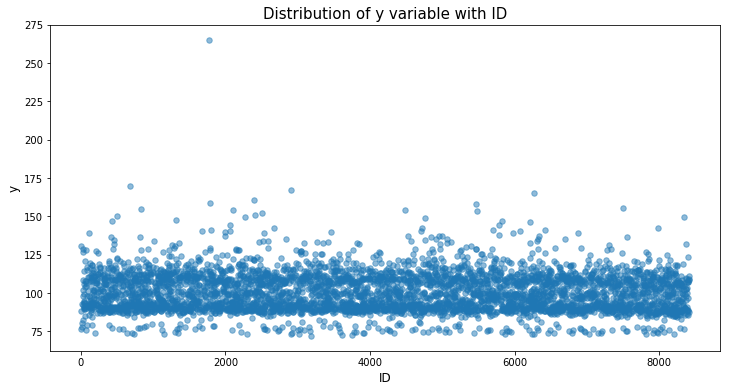

In [27]:
# regplot 回帰プロット　実際の値とモデルの予測がどれくらい当たっているか
var_name = "ID"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='y', data=train_df, fit_reg= False, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

ID変数の観点では多少減少傾向があります。ではトレーニングセットとテストセットでIDたちがどうやって分布しているか確認してみましょう。

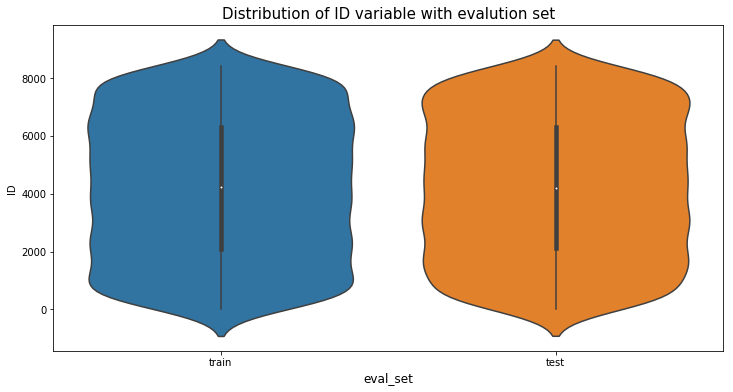

In [41]:
# トレーニングセットとテストセットのIDの分布をそれぞれプロットする
plt.figure(figsize=(6, 10))
train_df['eval_set'] = 'train'
test_df['eval_set'] = 'test'
full_df = pd.concat([train_df[["ID", 'eval_set']], test_df[["ID", 'eval_set']]], axis=0)

plt.figure(figsize=(12, 6))
sns.violinplot(x='eval_set', y='ID', data=full_df)
plt.xlabel("eval_set", fontsize=12)
plt.title("Distribution of ID variable with evalution set", fontsize=15)
plt.show()

トレーニングとテストでランダムに分かれていそうだ。

**重要な変数:**

いよいよxgboostを走らせて重要な変数を見つけよう！

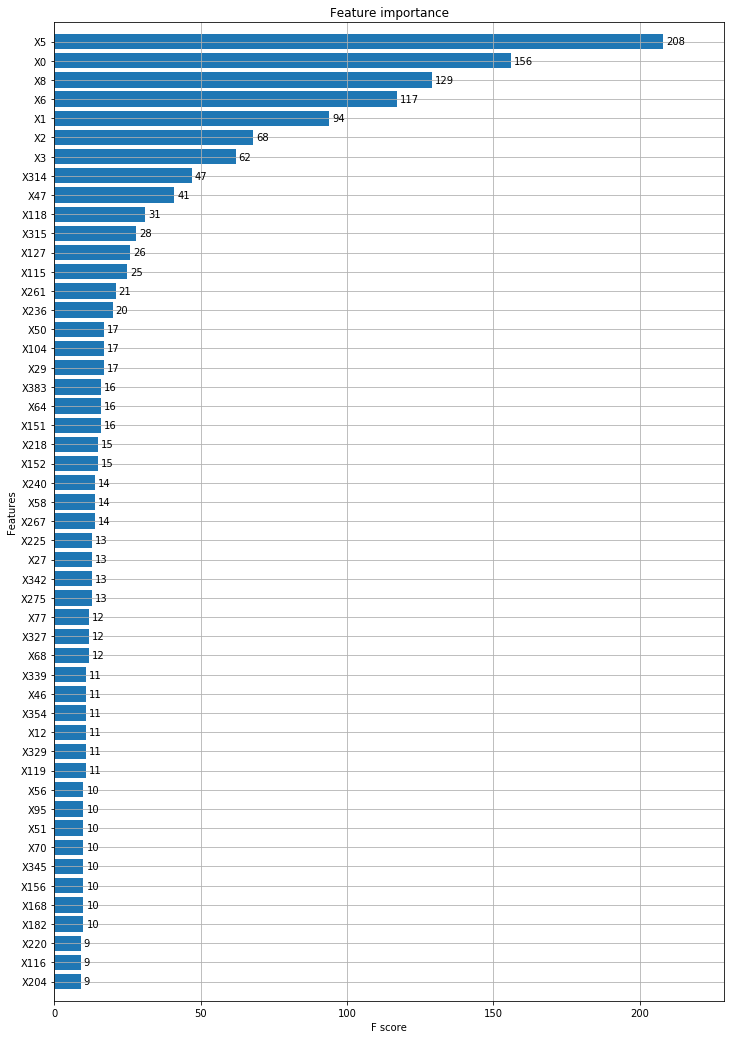

In [46]:
for f in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:# カテゴリーデータ
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[f].values))# カテゴリー値をリスト化して離散データに置き換える
    train_df[f] = lbl.transform(list(train_df[f].values))
    
train_y = train_df['y'].values
train_X = train_df.drop(['ID', 'y', 'eval_set'], axis=1) # 項目でID,y,eval_setは除く

# anokasさんありがとう！
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

# ハイパーパラメータ
xgb_params = {
    'eta': 0.05,
    'max_depth': 6, # ツリーの深さ
    'subsample': 0.7,
    'colsample_bytree': 0.7, # 各ステップの決定木ごとに用いる特徴量をサンプリングする。ランダムフォレストで行われているのと同じで，特徴量同士の交互作用を考慮した形のモデリングができるという利点があります。
    'objective':'reg:linear',
    'silent':1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values) # 学習データを
# 学習スタート
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# 重要な特徴上位50をプロット
fig, ax = plt.subplots(figsize=(12, 18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()


カテゴリーデータが上位を占めて、２値データが続いています。

続いてランダムフォレストで重要な変数を確認してみましょう。

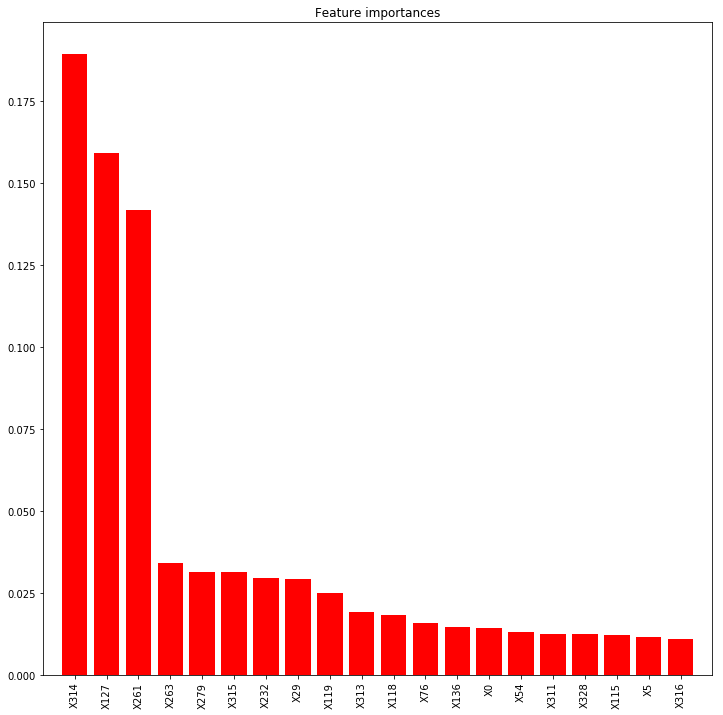

In [47]:
from sklearn import ensemble
# アンサンブル学習の一つであるランダムフォレストを使用
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, 
                                                                            max_features=0.2, n_jobs=-1,random_state=0)
# モデル学習
model.fit(train_X, train_y)
feat_names = train_X.columns.values

## 重要な変数をプロット
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20] # 上位20に絞る

plt.figure(figsize=(12, 12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

ランダムフォレストとxgboostでは重要な変数はかなり違いがありますね。
なぜだか分からないけど。

次回を乞うご期待。気に入ったら投票してね！